## JSON

# JSON - Javascript Object Notation
#### Invented by Douglas Crockford when working at Yahoo in early 2000s.

* Goal - Human Readable, Machine Parsable

* Specification: https://www.json.org/

JSON — short for JavaScript Object Notation — format for sharing data.

JSON is derived from the JavaScript programming language

Available for use by many languages including Python

usually file extension is .json when stored



In [ ]:
# Sample JSON below from https://json.org/example.html
# Question why is Syntax highlighting working properly ? :)

In [1]:
{"widget": {
    "debug": "on",
    "window": {
        "title": "Sample Konfabulator Widget",
        "name": "main_window",
        "width": 500,
        "height": 500
    },
    "image": {
        "src": "Images/Sun.png",
        "name": "sun1",
        "hOffset": 250,
        "vOffset": 250,
        "alignment": "center"
    },
    "text": {
        "data": "Click Here",
        "size": 36,
        "style": "bold",
        "name": "text1",
        "hOffset": 250,
        "vOffset": 100,
        "alignment": "center",
        "onMouseUp": "sun1.opacity = (sun1.opacity / 100) * 90;"
    }
}}


{'widget': {'debug': 'on',
  'window': {'title': 'Sample Konfabulator Widget',
   'name': 'main_window',
   'width': 500,
   'height': 500},
  'image': {'src': 'Images/Sun.png',
   'name': 'sun1',
   'hOffset': 250,
   'vOffset': 250,
   'alignment': 'center'},
  'text': {'data': 'Click Here',
   'size': 36,
   'style': 'bold',
   'name': 'text1',
   'hOffset': 250,
   'vOffset': 100,
   'alignment': 'center',
   'onMouseUp': 'sun1.opacity = (sun1.opacity / 100) * 90;'}}}

In [2]:
# if this was string starting with { it would be our json
mydata = {
    "firstName": "Jane",
    "lastName": "Doe",
    "hobbies": ["running", "sky diving", "dancing"],
    "age": 43,
    "children": [
        {
            "firstName": "Alice",
            "age": 7
        },
        {
            "firstName": "Bob",
            "age": 13
        }
    ]
}

In [3]:
# now mydata is just a Python dictionary nothing to do with JSON
# here we converted JSON text into Python dictionary
type(mydata)

dict

In [ ]:
# reminder that Python dictionary is just a collection of unordered key value pairs

In [4]:
print(mydata) # this is not JSON anymore this is just a Python dictionary(could have come from another source not only JSON)

{'firstName': 'Jane', 'lastName': 'Doe', 'hobbies': ['running', 'sky diving', 'dancing'], 'age': 43, 'children': [{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]}


In [ ]:
# so mydata is just a Python dictionary nothing to do with JSON anymore
# mydata contains keys and values
# some of the values are strings, some are integers, some are lists, some are dictionaries
# and some lists contain dictionaries and some dictionaries contain lists
# it is very common for data obtained from JSON to be nested - hierarchically structured

In [5]:
mydata['children'] # we use key to get value in this case we get a list

[{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]

In [6]:
type(mydata['children']) # when you see square brackets in json expect a list in Python

list

In [8]:
# we can get the first child from the list
mydata['children'][0] # remember indexing starts with 0

{'firstName': 'Alice', 'age': 7}

In [9]:
type(mydata['children'][0]) # so first item in the list is another dictionary

dict

In [10]:
mydata['children'][0]['age'] # we can get the age of the first child by using key

7

In [12]:
alices_age = mydata['children'][0]['age']
print(f"Alice is {alices_age} years old")

Alice is 7 years old


In [ ]:
mydata.keys()  # outer dictionary has 5 keys

dict_keys(['firstName', 'lastName', 'hobbies', 'age', 'children'])

In [ ]:
mydata['children'][0].keys() # inner dictionary has 2 keys

dict_keys(['firstName', 'age'])

In [14]:
mydata['children'][0]['firstName']
# so how do we know there is name, well we had to investiage the structure first


'Alice'

In [ ]:
mydata['children'][0].keys()

dict_keys(['firstName', 'age'])

In [15]:
# so for random dictionary we could have printed everything for 2nd child with
for key, value in mydata['children'][1].items(): # 1 because indexing starts with 0
    print(key, "::", value)

firstName :: Bob
age :: 13


In [ ]:
for key, value in mydata.items():
    print(key, "::", value)

firstName :: Jane
lastName :: Doe
hobbies :: ['running', 'sky diving', 'dancing']
age :: 43
children :: [{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]


In [ ]:
# so one of the issues with dealing with data extraced from deeply nested JSON is that
# you have to know the structure of the data before you can access it
# even then you can't flatten it out into a table without some concessions

In [ ]:
mydata['children'][-1]['age']

13

In [18]:
# remember for dictionaries get method will not throw an error if key is not found
mydata.get('hobbies') # get has the default value None if the key is not found

['running', 'sky diving', 'dancing']

In [19]:
mydata["car"] # bad key will throw an error so get would be a bit safer

KeyError: ignored

In [20]:
mydata.get("car") # gives us None if not found

In [ ]:
# JSON does not require any specific order of keys
# no specific structure of data - convenient but not always easy to work with

In [21]:
mydata.get('hobbies')[-1],mydata['hobbies'][-1],mydata['hobbies'][2]  # so 3 ways to access the same item

('dancing', 'dancing', 'dancing')

In [ ]:
# list has no get [1,2,3].get(2) get is dictionary specific not for lists!

In [ ]:
{"a":43,"b":30}.get("b")

30

In [ ]:
# until now we have been dealing with data stored in a dictionary
# now we are going to write data to a file in JSON format

## Serialization - encoding Python data to JSON


The process of encoding JSON is usually called serialization. This term refers to the transformation of data into a series of bytes (hence serial) to be stored or transmitted across a network. You may also hear the term marshaling, but that’s a whole other discussion. Naturally, deserialization is the reciprocal process of decoding data that has been stored or delivered in the JSON standard.

All we’re talking about here is reading and writing. Think of it like this: encoding is for writing data to disk, while decoding is for reading data into memory.
 https://realpython.com/python-json/

In [22]:
mydata # simply a PYthon dictionary with some lists inside etc
# theoretically I could copy and paste the output here into a text file and it would be valid JSOn
# however that is not always going to be the case due to small differences
# also it is not very practical especially for bigger data amounts

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13}]}

In [23]:
# we need a library for decoding and encoding json
# json is built into any standard Python installation
import json

In [24]:
# first we are going to dump our data into a text file
# we will use with context manager to open and close the file for safety
# instead of "data_file.json" any normal file name would do
# it is not required that you use .json extension but it would certainly make the most sense here
# technically it is going to be just a text file
with open("data_file.json", mode="w") as write_file: # w means write
    json.dump(mydata, write_file) # so mydata is going to be written here
    # mydata will typically be dictionary or list - which can have more inside
    # but technically it could be a string  (then you would get a normal text file)
    # or  single number but that would be very tiny json file :)
# remember that stream is closed here and file is written by now

In [25]:
# this will be nicer for humans to read
with open("data_file_indented.json", mode="w") as write_file:
    json.dump(mydata, write_file, indent=4) # so mydata could be aANY standard python data structure

In [26]:
# again .json files are just text files
# so if we read the file we will get a string
with open("data_file_indented.json") as f:
    raw_txt = f.read()
raw_txt[:150] # so again raw JSON is just text

'{\n    "firstName": "Jane",\n    "lastName": "Doe",\n    "hobbies": [\n        "running",\n        "sky diving",\n        "dancing"\n    ],\n    "age": 43,\n  '

In [27]:
type(raw_txt)

str

In [28]:
print(raw_txt)

{
    "firstName": "Jane",
    "lastName": "Doe",
    "hobbies": [
        "running",
        "sky diving",
        "dancing"
    ],
    "age": 43,
    "children": [
        {
            "firstName": "Alice",
            "age": 7
        },
        {
            "firstName": "Bob",
            "age": 13
        }
    ]
}


In [ ]:
# deserialization - converting JSON text into Python(or other programming language) data structure
# why would you want to do that?
# because you want to work with the data in Python - and working with strings is not very convenient
# we want the structure of the data to be preserved

## Deserializing, decoding raw JSON text into Python data format

In [29]:
# parse, deserialize, decode from json string into Python Data structure
my_data = json.loads(raw_txt) # raw_txt is a string
type(my_data)
# typically we will be using json.load for reading json from files not strings

dict

In [ ]:
my_data.keys()

dict_keys(['firstName', 'lastName', 'hobbies', 'age', 'children'])

In [31]:
my_data['children']

[{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]

In [32]:
charlie = {'age': 14, 'firstName': 'Čarlijs'}  # new dictionary  with 2 keys-value pairs
charlie  #this dictionary is not in JSON format, it is not related to JSON at all
# so this will apply to any non English language that uses Unicode characters beyond 255

{'age': 14, 'firstName': 'Čarlijs'}

In [33]:
type(my_data['children'])

list

In [34]:
my_data['children'].append(charlie)

In [ ]:
my_data

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13},
  {'age': 14, 'firstName': 'Čarlijs'}]}

In [35]:
my_data['hobbies'].append('šahs')  #šahs - chess in Latvian
my_data

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing', 'šahs'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13},
  {'age': 14, 'firstName': 'Čarlijs'}]}

In [36]:
my_data["car"] = "Ņiva" # i am trying to make a point about Unicode
my_data

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing', 'šahs'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13},
  {'age': 14, 'firstName': 'Čarlijs'}],
 'car': 'Ņiva'}

In [37]:
# so i will save the freshly updated data to a file
# not everything is in English!
with open("data_file_indented_ascii.json", mode="w") as f_stream:
    json.dump(my_data, f_stream, indent=4)

In [38]:
# so if we want to save in Unicode in UTF-8 encoding we need to specify it
# this is the recipe to use if you want to save in Unicode
with open("data_file_indented_unicode.json", mode="w", encoding="UTF-8") as f_stream:
    json.dump(my_data, f_stream, indent=4, ensure_ascii=False) # I want to see Unicode

In [ ]:
# three are no strict restriction on what we append to our lists
# in the previous example I could have added a number or another list, not necessarily a string


## Loading data from JSON file immediately into memory

In [39]:
# more often we will load json immediately
with open("data_file_indented_unicode.json", encoding="utf-8") as file_stream:
    my_data_2 = json.load(file_stream) # if json is malformed then you will get some sort of error
type(my_data_2)

dict

In [40]:
my_data_2

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing', 'šahs'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13},
  {'age': 14, 'firstName': 'Čarlijs'}],
 'car': 'Ņiva'}

In [42]:
# contents are the same but two different objects
# contents are equal but not the same
# like two shopping bags with the same contents, same milk, same bread, same eggs
print("Contents of my_data and my_data_2 are same?", my_data == my_data_2)
print("Objects holding data are same?", my_data is my_data_2)

Contents of my_data and my_data_2 are same? True
Objects holding data are same? False


In [ ]:
my_json_string = json.dumps(my_data) # converst Python data structure into json string
my_json_string[:100]

'{"firstName": "Jane", "lastName": "Doe", "hobbies": ["running", "sky diving", "dancing", "\\u0161ahs"'

In [ ]:
json.dumps("Kaķis") # so non english characters get encoded into unicode special codes

'"Ka\\u0137is"'

In [ ]:
json.dumps("Kaķis", ensure_ascii=False) # so now we can see non-English

'"Kaķis"'

In [ ]:
ord("ķ"),chr(1*16*16+3*16+7) # that's how hexadecimal coding works

(311, 'ķ')

In [ ]:
type(my_json_string)

str

In [ ]:
json.loads(my_json_string)

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13}]}

In [ ]:
json.dumps(my_data)

'{"firstName": "Jane", "lastName": "Doe", "hobbies": ["running", "sky diving", "dancing"], "age": 43, "children": [{"firstName": "Alice", "age": 7}, {"firstName": "Bob", "age": 13}]}'

In [ ]:
with open("data_file_indented_unicode.json", encoding="UTF-8") as file_stream:
  loaded_data = json.load(file_stream)
loaded_data

{'age': 43,
 'car': 'Ņiva',
 'children': [{'age': 7, 'firstName': 'Alice'},
  {'age': 13, 'firstName': 'Bob'},
  {'age': 14, 'firstName': 'Čarlijs'}],
 'firstName': 'Jane',
 'hobbies': ['running', 'sky diving', 'dancing', 'boxing'],
 'lastName': 'Doe'}

In [ ]:
# there is a mapping of Python data types to JSON data types
# Python data type  JSON data type
# dict              object
# list, tuple       array
# str               string
# int, float        number
# True              true
# False             false
# None              null

# notice that JSON is more limited than Python
# not everything can be converted to JSON without loss of information
# for example tuples are converted to lists and you can't tell the difference

# another limitation is that JSON does not allow for comments!
# there have been recommendations to use JSON5 but it is not widely adopted

In [ ]:
# uses of JSON

# JSON is used for data interchange between web applications
# also used for data interchange between web applications and mobile applications
# also used for settings files, configuration files, data files
# there are databases that use JSON as a data storage format
# there are databases that use JSON as a query language

# here we are interested in using JSON as a data interchange format
# to obtain data from a web application / page

## API  in general - JSON APIs

In [ ]:
# API - Application Programming Interface, a set of functions that allow you to interact with an application
# JSON API - a set of functions that allow you to interact with an application using JSON

# extremely popular way to interact with web applications
# why ? because it is simple and easy to use

# there are more difficult ways to interact with web applications

In [44]:
import requests # this library is not included with Python but is very popular and comes with Anaconda
# requests is also included with Google Colab
# pip install requests otherwise in a terminal
# above would be line on local machine
# more on requests: https://pypi.org/project/requests/


### Making a web get request using requests library

In [46]:
url = "https://jsonplaceholder.typicode.com/users" # this is a public API
# url - uniform resource locator
# uri - uniform resource identifier
# url vs uri - https://stackoverflow.com/questions/176264/what-is-the-difference-between-a-uri-a-url-and-a-urn

response = requests.get(url) # so this is a GET request similar to what happens when web browser loads a page
# so get method returns a response object, it made a network request to the server at that url
print(response.status_code) # Response Code 200 is good
# in your notebooks you might want to include something like assert or if statement
assert response.status_code == 200 # this would give you error if response is not 200
# idea is to stop your notebook if you are running All code sells from top to bottom
# assert does nothing if the evaluation is True

200


In [ ]:
# list of HTTP response codes
# https://en.wikipedia.org/wiki/List_of_HTTP_status_codes
# 404 - not found
# 500 - internal server error
# 200 - OK
# 4xx - client error - it is our fault
# 5xx - server error - it is the server's fault

In [47]:
print(response.text) # .text is a string

[
  {
    "id": 1,
    "name": "Leanne Graham",
    "username": "Bret",
    "email": "Sincere@april.biz",
    "address": {
      "street": "Kulas Light",
      "suite": "Apt. 556",
      "city": "Gwenborough",
      "zipcode": "92998-3874",
      "geo": {
        "lat": "-37.3159",
        "lng": "81.1496"
      }
    },
    "phone": "1-770-736-8031 x56442",
    "website": "hildegard.org",
    "company": {
      "name": "Romaguera-Crona",
      "catchPhrase": "Multi-layered client-server neural-net",
      "bs": "harness real-time e-markets"
    }
  },
  {
    "id": 2,
    "name": "Ervin Howell",
    "username": "Antonette",
    "email": "Shanna@melissa.tv",
    "address": {
      "street": "Victor Plains",
      "suite": "Suite 879",
      "city": "Wisokyburgh",
      "zipcode": "90566-7771",
      "geo": {
        "lat": "-43.9509",
        "lng": "-34.4618"
      }
    },
    "phone": "010-692-6593 x09125",
    "website": "anastasia.net",
    "company": {
      "name": "Deckow-Crist

In [49]:
# it would be much easier to work with this data if it was in a Python data structure
# so requests provides a method to convert the response text into a Python data structure
# use this if you know that the response is in JSON format
users = response.json() # this will work if we requested a JSON resource (NOT HTML!!)
type(users) # so users is just Python data structure (most likely list or dictionary)
# you can get an idea beforehand by peaking at first character of JSON text { -> dict, [ -> list

list

In [50]:
users[-1] # last user

{'id': 10,
 'name': 'Clementina DuBuque',
 'username': 'Moriah.Stanton',
 'email': 'Rey.Padberg@karina.biz',
 'address': {'street': 'Kattie Turnpike',
  'suite': 'Suite 198',
  'city': 'Lebsackbury',
  'zipcode': '31428-2261',
  'geo': {'lat': '-38.2386', 'lng': '57.2232'}},
 'phone': '024-648-3804',
 'website': 'ambrose.net',
 'company': {'name': 'Hoeger LLC',
  'catchPhrase': 'Centralized empowering task-force',
  'bs': 'target end-to-end models'}}

In [51]:
type(users[-1]) # will be a dictionary

dict

### List of dictionaries

Lists of dictionaries are often used to present data that was originally in tables
Each row is an entry in list, then each entry is a dictionary
and then each column name is key and each column value for that row is the value

In [52]:
users[-1]['name']  # a string

'Clementina DuBuque'

In [ ]:
# how could we get first and last?

In [53]:
last_user_names = users[-1]['name']
last_user_names

'Clementina DuBuque'

In [54]:
name_list = last_user_names.split(" ") # just a regular Python split method nothing to do with JSON
name_list

['Clementina', 'DuBuque']

In [55]:
first_name = name_list[0]
last_name = name_list[-1]
first_name, last_name

('Clementina', 'DuBuque')

In [59]:
# so here latitute and longitude are strings
# they are deeply nested in the data structure
# list then dict then dict and one last dict
# lattitude for the last user
lat = users[-1]['address']['geo']['lat'] # so we have 3 levels of dictionaries here!!
# it would be safer to use get method if you are not sure that the key exists
lat # it is a string

'-38.2386'

In [60]:
lat = float(lat) # another common issue is that often JSON numbers are actually strings
# so check whether number is in quotes as in here
lat # now it is a number, floating (with a comma)

-38.2386

In [ ]:
# not all APIs are free
# many require API keys
# those can be paid or free
# you obtain keys from the service provider
# in general
# API keys should not be shown in public notebooks!
# especially the paid ones
# if you publicly share your Amazon AWS key expect a VERY LARGE BILL SOON - or a very long talk with your provider


In [ ]:
# mockaroo.com is a free service that provides fake data similar to what you would get from a real API
# you can use it to test your code
# but to use it you it is recommended to register and get an API key

In [61]:
# we make a http request to a url and print the response code
# url stands for uniform resource locator
url = "https://my.api.mockaroo.com/ageincluded.json?key=58227cb0"
# careful with publishing your API keys - they can be used to make requests on your behalf
# in this case this key was registered by me and is not a secret, long time ago I used it for a course
# there are many horror stories about people publishing their API keys and then getting charged for requests
# so you should get your own API key and not use mine in general
response = requests.get(url)
print(response.status_code) # Response Code 200 is good!

200


### List of HTTP codes
* 200 is OK - everything is as expected, we asked for resource and we got it
* the most famous is 404 code for not found, most likely from typos or resource missing
* https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

In [ ]:
response.text[:50]

'[{"id":1,"first_name":"Ibbie","last_name":"Bennoug'

In [ ]:
data_from_json = response.json() # we do not need json.loads
type(data_from_json), len(data_from_json)

(list, 100)

In [ ]:
my_mock_data = json.loads(response.text) # kind of useless since we have response.json()
type(my_mock_data), len(my_mock_data)

(list, 100)

In [ ]:
data_from_json == my_mock_data, data_from_json is my_mock_data
# again data is the same, but 2 different objects

(True, False)

In [ ]:
type(my_mock_data) # this will be a list

list

In [ ]:
first_user = my_mock_data[0]
type(first_user) # this will be a dictionary

dict

In [ ]:
age_first_user = first_user['age']
age_first_user  # you will have different ages, different fake data

66

In [ ]:
print(my_mock_data[:5])  # print first 5 entries

[{'id': 1, 'first_name': 'Ibbie', 'last_name': 'Bennough', 'email': 'ibennough0@flavors.me', 'gender': 'Female', 'ip_address': '117.74.74.198', 'age': 66}, {'id': 2, 'first_name': 'Rosalynd', 'last_name': 'Lovick', 'email': 'rlovick1@multiply.com', 'gender': 'Polygender', 'ip_address': '83.171.100.15', 'age': 41}, {'id': 3, 'first_name': 'Gardy', 'last_name': 'Collelton', 'email': 'gcollelton2@cbsnews.com', 'gender': 'Male', 'ip_address': '211.207.5.164', 'age': 71}, {'id': 4, 'first_name': 'Renate', 'last_name': 'Whiskerd', 'email': 'rwhiskerd3@webeden.co.uk', 'gender': 'Female', 'ip_address': '113.89.221.75', 'age': 94}, {'id': 5, 'first_name': 'Reta', 'last_name': 'Steljes', 'email': 'rsteljes4@163.com', 'gender': 'Female', 'ip_address': '31.183.217.60', 'age': 47}]


In [ ]:
# let's get a list of all the ages
age_list = [person["age"] for person in my_mock_data]
age_list

[66,
 41,
 71,
 94,
 47,
 19,
 3,
 97,
 90,
 57,
 75,
 25,
 100,
 56,
 70,
 60,
 23,
 64,
 7,
 35,
 71,
 64,
 82,
 99,
 27,
 39,
 4,
 98,
 57,
 49,
 50,
 16,
 57,
 55,
 12,
 81,
 80,
 22,
 53,
 30,
 48,
 21,
 76,
 78,
 39,
 43,
 31,
 3,
 91,
 39,
 69,
 76,
 34,
 32,
 35,
 84,
 59,
 10,
 16,
 47,
 90,
 31,
 37,
 92,
 63,
 95,
 35,
 57,
 58,
 81,
 17,
 72,
 56,
 64,
 3,
 63,
 43,
 33,
 40,
 6,
 7,
 69,
 98,
 73,
 54,
 31,
 28,
 97,
 55,
 36,
 64,
 38,
 95,
 3,
 61,
 57,
 53,
 28,
 93,
 57]

In [ ]:
average_age = sum(age_list)/len(age_list)
average_age

52.1

In [ ]:
import pandas as pd # Anaconda includes by default think of Excel on steroids

In [ ]:
# what is Pandas?

# Pandas is a library for data analysis
# it is built on top of NumPy
# it is very popular in data science
# it is very popular in data engineering
# it is very popular in data analytics
# it is very popular in data visualization
# it is very popular in machine learning
# it is very popular in deep learning
# it is very popular in artificial intelligence

# it can handle much larger data sets than Excel


In [ ]:
df = pd.read_json(url) # so Pandas includes parsing JSON
# so read_json made a network request to the server at that url
# in this case this API gives you new data each time you make a request
df.head()  # .head method will show you the first 5 rows, you can specify how many rows like .head(10)

,id,first_name,last_name,email,gender,ip_address,age
0,1,Moira,Ranger,mranger0@timesonline.co.uk,Female,58.163.121.253,31
1,2,Ragnar,O'Brogane,robrogane1@bing.com,Male,147.50.239.79,4
2,3,Marten,Bartke,mbartke2@blinklist.com,Male,18.217.103.111,99
3,4,Linnet,Semrad,lsemrad3@dagondesign.com,Female,126.13.65.83,1
4,5,Korry,Lindro,klindro4@google.cn,Female,51.165.30.218,77


In [ ]:
# maybe we have to leave our work and we want to save the data
df.to_csv("mock_data.csv") # could go back to json, or perhaps xlsx or other formats such as database

In [ ]:
df.to_excel("mock_data.xlsx")  # saving to excel might require xlwt or openpyxl libraries to be installed
# you can install them with pip install xlwt or pip install openpyxl

In [ ]:
# now we can play around with some statistics
# lets get the average age - age is a column in the dataframe
df.age.mean()

48.55

In [ ]:
# let's check different gender counts
df.gender.value_counts()

Male           44
Female         40
Agender         5
Bigender        3
Polygender      3
Genderqueer     3
Genderfluid     1
Non-binary      1
Name: gender, dtype: int64

In [ ]:
data_from_json[:2] # first two entries

[{'id': 1,
  'first_name': 'Ibbie',
  'last_name': 'Bennough',
  'email': 'ibennough0@flavors.me',
  'gender': 'Female',
  'ip_address': '117.74.74.198',
  'age': 66},
 {'id': 2,
  'first_name': 'Rosalynd',
  'last_name': 'Lovick',
  'email': 'rlovick1@multiply.com',
  'gender': 'Polygender',
  'ip_address': '83.171.100.15',
  'age': 41}]

In [ ]:
# so instead of reading from a url we can read from a file here we pass a json data structure
df2 = pd.DataFrame(data_from_json) # in this data_from_json is Python data structure list
df2.head()

,id,first_name,last_name,email,gender,ip_address,age
0,1,Ibbie,Bennough,ibennough0@flavors.me,Female,117.74.74.198,66
1,2,Rosalynd,Lovick,rlovick1@multiply.com,Polygender,83.171.100.15,41
2,3,Gardy,Collelton,gcollelton2@cbsnews.com,Male,211.207.5.164,71
3,4,Renate,Whiskerd,rwhiskerd3@webeden.co.uk,Female,113.89.221.75,94
4,5,Reta,Steljes,rsteljes4@163.com,Female,31.183.217.60,47


In [ ]:
# lets get average age of males in our dataframe

df[df.gender == "Male"].age.mean() # so we are filtering the dataframe



50.25

In [ ]:
# how about female average age?

df[df.gender == "Female"].age.mean() # so we are filtering the dataframe

39.175

In [ ]:
# we can also generate some statistics for all the columns
df.describe()

,id,age
count,100.000000,100.000000
mean,50.500000,48.550000
std,29.011492,29.205083
min,1.000000,1.000000
25%,25.750000,19.000000
50%,50.500000,47.500000
75%,75.250000,75.000000
max,100.000000,99.000000


In [ ]:
# in this case our dataframe in df only has two numeric columns
df.info() # lets see what data types we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int64 
 1   first_name  100 non-null    object
 2   last_name   100 non-null    object
 3   email       100 non-null    object
 4   gender      100 non-null    object
 5   ip_address  100 non-null    object
 6   age         100 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [ ]:
# if you want to describe non-numeric columns you can do this
df.describe(include="all") # this will include all columns

,id,first_name,last_name,email,gender,ip_address,age
count,100.000000,100,100,100,100,100,100.000000
unique,NaN,100,100,100,8,100,NaN
top,NaN,Paulina,Watmough,dgarstang1w@stanford.edu,Male,127.83.77.87,NaN
freq,NaN,1,1,1,44,1,NaN
mean,50.500000,NaN,NaN,NaN,NaN,NaN,48.550000
std,29.011492,NaN,NaN,NaN,NaN,NaN,29.205083
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,25.750000,NaN,NaN,NaN,NaN,NaN,19.000000
50%,50.500000,NaN,NaN,NaN,NaN,NaN,47.500000
75%,75.250000,NaN,NaN,NaN,NaN,NaN,75.000000


In [ ]:
# we can transpose the columns and rows
df.describe(include="all").T # NaN means not a number

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,100.0,NaN,NaN,NaN,50.5,29.011492,1.0,25.75,50.5,75.25,100.0
first_name,100,100,Paulina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,100,100,Watmough,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email,100,100,dgarstang1w@stanford.edu,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,100,8,Male,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip_address,100,100,127.83.77.87,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,100.0,NaN,NaN,NaN,48.55,29.205083,1.0,19.0,47.5,75.0,99.0


<AxesSubplot:ylabel='Frequency'>

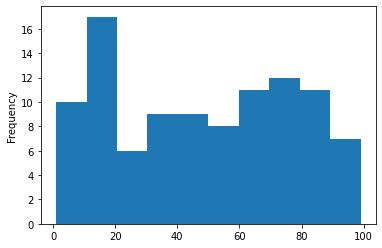

In [ ]:
# lets plot the data for ages
df.age.plot(kind="hist") # kind is the type of plot

<AxesSubplot:ylabel='Frequency'>

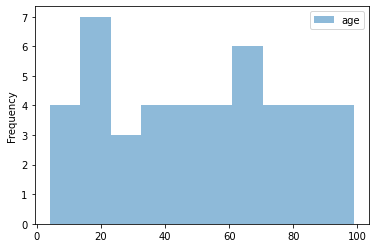

In [ ]:
# lets plot female and male age histograms in one plot

males = df[df.gender == "Male"]
females = df[df.gender == "Female"]

# lets plot age distributions for males and females side by side

males.plot(kind="hist", y="age", alpha=0.5) # alpha is transparency



<AxesSubplot:ylabel='Frequency'>

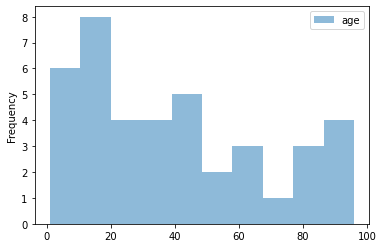

In [ ]:
females.plot(kind="hist", y="age", alpha=0.5) # alpha is transparency

In [ ]:
# so this data looks quite suspicious - it is actually fake data
# why is it suspicious?

# because the age history is evenly distributed - not realistic

In [ ]:
data_from_json[:5]

[{'address': {'city': 'Gwenborough',
   'geo': {'lat': '-37.3159', 'lng': '81.1496'},
   'street': 'Kulas Light',
   'suite': 'Apt. 556',
   'zipcode': '92998-3874'},
  'company': {'bs': 'harness real-time e-markets',
   'catchPhrase': 'Multi-layered client-server neural-net',
   'name': 'Romaguera-Crona'},
  'email': 'Sincere@april.biz',
  'id': 1,
  'name': 'Leanne Graham',
  'phone': '1-770-736-8031 x56442',
  'username': 'Bret',
  'website': 'hildegard.org'},
 {'address': {'city': 'Wisokyburgh',
   'geo': {'lat': '-43.9509', 'lng': '-34.4618'},
   'street': 'Victor Plains',
   'suite': 'Suite 879',
   'zipcode': '90566-7771'},
  'company': {'bs': 'synergize scalable supply-chains',
   'catchPhrase': 'Proactive didactic contingency',
   'name': 'Deckow-Crist'},
  'email': 'Shanna@melissa.tv',
  'id': 2,
  'name': 'Ervin Howell',
  'phone': '010-692-6593 x09125',
  'username': 'Antonette',
  'website': 'anastasia.net'},
 {'address': {'city': 'McKenziehaven',
   'geo': {'lat': '-68.61

In [ ]:
myjson = data_from_json # just an alias

In [ ]:
japanese = [person for person in myjson if person.get('email').endswith('.jp')]
# person is something I made up for the list comprehension above
# potentially person.get('email') could return None then .endswith('.jp') would fail with error
japanese

[]

In [ ]:
japanese_men = [p for p in japanese if p.get('gender') == "Male"]
# potentially person.get('email') could return None then .endswith('.jp') would fail with error
japanese_men

[]

In [ ]:
uk = [person for person in myjson if person.get('email',"").endswith('.uk')]
# we added "" to get so that if there is no email the endswith does not fail
uk

[]

In [ ]:
uk_ages = [(person.get('first_name'),int(person.get('age'))) for person in uk]
uk_ages

[]

In [ ]:
uk_frame = df2[df2.email.str.endswith(".uk")]
uk_frame

,id,name,username,email,address,phone,website,company


In [ ]:
uk_frame.age.describe() # so we can get some statistics for pretty much free

AttributeError: ignored

In [ ]:
age_sum = 0
for person in uk_ages:
    age_sum += person[1] # becauseuk ages are in format Name and age, so 2nd item is age with index 1
print("Average age in UK is:", age_sum/len(uk_ages))

In [ ]:
jp_ages = [(person.get('first_name'),int(person.get('age'))) for person in japanese]
jp_ages

In [ ]:
with open("uk_ages.json", mode="w") as fstream:
    json.dump(uk_ages, fstream, indent=4)

In [ ]:
# so we lose the tuple designed when writing to JSON and back
with open("uk_ages.json") as fstream:
    uk_data = json.load(fstream)
uk_data

In [ ]:
with open("jp_ages.json", mode="w") as fstream:
    json.dump(jp_ages, fstream, indent=4)

In [ ]:
df2.head()

In [ ]:
df2.describe(include="O") # we can get some statistics on our strings and objects

In [ ]:
df2.describe() # for number analysis

In [ ]:
# so Hayward is the most common first name with 2, and 52 Males and 48 Females

In [ ]:
type(mydata)

In [ ]:
type(json_string)

In [ ]:
type(mydata)

In [ ]:
# Convert Json_string back to our Python Object
my_obj = json.loads(json_string)
my_obj

In [ ]:
my_obj.get('firstName')

In [ ]:
mydata

In [ ]:
newlist = json.loads('[1,3,5,"Valdis"]')
newlist

In [ ]:
type(newlist)

In [ ]:
badlist = json.loads('[1,3,5,"Vald]",334342]')
badlist

In [ ]:
type(json_string)

In [ ]:
# Avove example JSON and Python object have the same syntax but there are some differences

![object](https://github.com/ValRCS/Digital_Discourse_ETH713_Fall_2020/blob/main/img/object.png?raw=1)

![Array](https://github.com/ValRCS/Digital_Discourse_ETH713_Fall_2020/blob/main/img/array.png?raw=1)

![Value](https://github.com/ValRCS/Digital_Discourse_ETH713_Fall_2020/blob/main/img/value.png?raw=1)

Simple Python objects are translated to JSON according to a fairly intuitive conversion.

Python	JSON

dict	object

list, tuple	array

str	string

int, long,

float	number

True	true

False	false

None	null

In [ ]:
newlist = json.loads('[true,2,null, false, 555.333]')
newlist

[True, 2, None, False, 555.333]

In [ ]:
# The first option most people want to change is whitespace. You can use the indent keyword argument to specify the indentation size for nested structures. Check out the difference for yourself by using data, which we defined above, and running the following commands in a console:

json.dumps(mydata)


'{"firstName": "Jane", "lastName": "Doe", "hobbies": ["running", "sky diving", "dancing"], "age": 43, "children": [{"firstName": "Alice", "age": 7}, {"firstName": "Bob", "age": 13}]}'

In [ ]:
# very useful for visibility!
print(json.dumps(mydata, indent=4))

In [ ]:
with open("data_file.json", "w") as write_file:
    json.dump(mydata, write_file, indent=4)

In [ ]:
# how to read json into our python data obj from file
with open("data_file.json", "r") as read_file:
    data = json.load(read_file)
data

In [ ]:
type(data)

In [ ]:
len(data)

In [ ]:
list(data.items())

In [ ]:
numberedlist = list(enumerate(data.items()))
numberedlist

In [ ]:
# save numberedlist with ident = 4 in file numberedlist.json
with open('numberedlist.json', mode='w') as f:
    json.dump(numberedlist, f, indent=4)


Keep in mind that the result of this method could return any of the allowed data types from the conversion table. This is only important if you’re loading in data you haven’t seen before. In most cases, the root object will be a dict or a list.

If you've gotten JSON data in from another program or have otherwise obtained a string of JSON formatted data in Python, you can easily deserialize that with loads(), which naturally loads from a string:

In [ ]:
json_string = """
{
    "researcher": {
        "name": "Ford Prefect",
        "species": "Betelgeusian",
        "relatives": [
            {
                "name": "Zaphod Beeblebrox",
                "species": "Betelgeusian"
            }
        ]
    }
}
"""
data = json.loads(json_string)
data

In [ ]:
# get value of relative's name
data['researcher']

In [ ]:
# get value of relative's name
data['researcher']['relatives']

In [ ]:
# get value of relative's name
data['researcher']['relatives'][0]

In [ ]:
# get value of relative's name
data['researcher']['relatives'][0]['name']

In [ ]:
data['researcher']['relatives'][0]['name'].split()[0]

In [ ]:
data['researcher']['relatives'][0]['name'].split()[0][:4]

In [ ]:
type(data)

In [ ]:
import json
import requests

In [ ]:
## Lets get some data https://jsonplaceholder.typicode.com/

In [ ]:
response = requests.get("https://jsonplaceholder.typicode.com/todos")
if response.status_code != 200:
    print("Bad Response: ", response.status_code)
print(response.status_code)
todos = json.loads(response.text)


can open https://jsonplaceholder.typicode.com/todos in regular browser too..

In [ ]:
type(todos)

In [ ]:
len(todos)

In [ ]:
todos[:10]

In [ ]:
# completedworks = [el for el in todos if el['completed'] == True]
completedworks = [el for el in todos if el.get('completed') == True]
len(completedworks)

In [ ]:
completedworks[-10:]

In [ ]:
type(completedworks)

In [ ]:
users = {}
for el in completedworks:
    k = el['userId']
    if k in users:
        users[k] +=1
    else:
        users[k] = 1
users

In [ ]:
sorted(users.items(),key = lambda el: el[1], reverse=True)

In [ ]:
from collections import Counter

In [ ]:
count = Counter([el['userId'] for el in completedworks])
count.most_common()

In [ ]:
# lets do everything at once
finishedcount = Counter([el.get('userId') for el in todos if el.get('completed') == True])
finishedcount.most_common()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(finishedcount.keys(), finishedcount.values())
plt.show()

In [ ]:
todos[-3:]

In [ ]:
[1,2] + [3,4,6,6]

In [ ]:
todos += [{'completed':True},{'completed':True},{'completed':True},{'completed':True}]
todos[-5:]

In [ ]:
# lets do everything at once
finishedcount = Counter([el.get('userId') for el in todos if el.get('completed') == True])
finishedcount.most_common()

In [ ]:
myl = [('Valdis', 40), ('Alice',35), ('Bob', 23),('Carol',70)]

In [ ]:
# Lambda = anonymous function

In [ ]:
def myfun(el):
    return el[1]
# same as myfun = lambda el: el[1]

In [ ]:
sorted(myl, key = lambda el: el[1], reverse=True)

In [ ]:
# Exercise find out top 3 users with most tasks completed!

# TIPS
# we need some sort of structure to store these user results before finding out top 3
# at least two good data structure choices here :)
# here the simplest might actually be the best if we consider userId values


In [ ]:
todos[0]

In [ ]:
todos[0]['userId']

In [ ]:
todos[0]['completed']

In [ ]:
# Here we create a new dictionary and and count the completed works by id
newdict = {}
for todo in todos:
    if todo['completed'] == True:
        if todo['userId'] in newdict:
            newdict[todo['userId']] += 1
        else:
            newdict[todo['userId']] = 1

In [ ]:
newdict

In [ ]:
sorted(newdict.items())

In [ ]:
bestworkers = sorted(newdict.items(), key=lambda el: el[1], reverse=True)
bestworkers[:3]

In [ ]:
users = [ el['userId'] for el in todos]
len(users),users[:15]

In [ ]:
uniqusers = set(users)
uniqusers

In [ ]:
# dictionary comprehension but could live without one
users = { el['userId'] : 0 for el in todos}

In [ ]:
users

In [ ]:
users.keys()

In [ ]:
users.value

In [ ]:
#{'completed': True,
# 'id': 8,
#  'title': 'quo adipisci enim quam ut ab',
#  'userId': 1}

In [ ]:
#idiomatic
for el in todos:
    users[el['userId']] += el['completed'] # Boolean False is 0 True is 1 obviously this might not be too readable

In [ ]:
# same as above could be useful in more complicated cases
for el in todos:
    if el['completed'] == True:
        users[el['userId']] += 1

In [ ]:
# there could be a one liner or a solution with from collections import Counter

In [ ]:
users.items()

In [ ]:
list(users.items())

In [ ]:
userlist=list(users.items())

In [ ]:
type(userlist[0])

In [ ]:
# we pass a key anonymous(lambda) function
sorted(userlist, key=lambda el: el[1], reverse=True)[:3]

In [ ]:
# lets try a simple way

In [ ]:
mylist=[0]
mylist*=11

In [ ]:
for el in todos:
    if el['completed'] == True:
        mylist[el['userId']] +=1

In [ ]:
mylist

In [ ]:
mylist.index(max(mylist))

In [ ]:
# kind of hard to get more values need to get tricky

# How about Pandas and Json ?

Pandas is a big data analysis library in Python
It is included with Google Colab
Otherwise you would have to install it with pip install pandas

In [62]:
import pandas as pd

In [63]:
df = pd.read_json('https://jsonplaceholder.typicode.com/todos')
# again this will particularly well with lists of dictionaries in Python terms
# or in JSON terms Array of Objects

In [65]:
df.head()

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False


In [66]:
# We can export to tabular format such as csv
df.to_csv('my_todos.csv')
# again good for flat 2d type of data even if it was originally in JSON

In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,userId,id
count,200.000000,200.000000
mean,5.500000,100.500000
std,2.879489,57.879185
min,1.000000,1.000000
25%,3.000000,50.750000
50%,5.500000,100.500000
75%,8.000000,150.250000
max,10.000000,200.000000


In [ ]:
df.describe(include=['O'])

,title
count,200
unique,200
top,occaecati adipisci est possimus totam
freq,1


In [ ]:
# we see that completed
df.groupby(['userId']).sum()

,id,completed
userId,,
1,210,11.0
2,610,8.0
3,1010,7.0
4,1410,6.0
5,1810,12.0
6,2210,6.0
7,2610,9.0
8,3010,11.0
9,3410,8.0


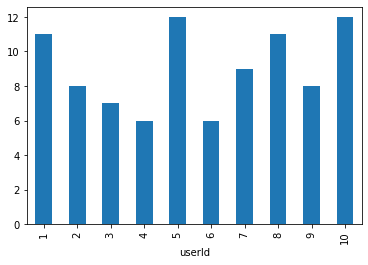

In [ ]:
df.groupby(['userId']).sum()['completed'].plot(kind="bar")

In [ ]:
busyjson

'{"10":12.0,"5":12.0,"8":11.0,"1":11.0,"7":9.0,"9":8.0,"2":8.0,"3":7.0,"6":6.0,"4":6.0}'

In [ ]:
df.groupby(['userId'])['completed'].sum()

userId
1     11.0
2      8.0
3      7.0
4      6.0
5     12.0
6      6.0
7      9.0
8     11.0
9      8.0
10    12.0
Name: completed, dtype: float64

In [ ]:
# if we need a single column dataframe
df.groupby(['userId'])[['completed']].sum()

,completed
userId,
1,11.0
2,8.0
3,7.0
4,6.0
5,12.0
6,6.0
7,9.0
8,11.0
9,8.0


In [ ]:
df.groupby(['userId'])['completed'].sum().sort_values()

userId
4      6.0
6      6.0
3      7.0
2      8.0
9      8.0
7      9.0
1     11.0
8     11.0
5     12.0
10    12.0
Name: completed, dtype: float64

In [ ]:
df.groupby(['userId'])['completed'].sum().sort_values(ascending=False)

userId
10    12.0
5     12.0
8     11.0
1     11.0
7      9.0
9      8.0
2      8.0
3      7.0
6      6.0
4      6.0
Name: completed, dtype: float64

In [ ]:
busyjson = pd.read_json('https://jsonplaceholder.typicode.com/todos').groupby(['userId'])['completed'].sum().sort_values(ascending=False).to_json()

In [ ]:
def prettyJSON(myjson):
    return json.dumps(json.loads(myjson), indent=4)

In [ ]:
type(busyjson)

str

In [ ]:
prettybusy = prettyJSON(busyjson)

In [ ]:
with open('prettybusy.json', mode='w') as f:
    f.write(prettybusy)

# Exercise Find Public JSON API get data and convert it into Pandas DataFrame

## Many possible sources

https://github.com/toddmotto/public-apis
    
### You want the ones without authorization and WITH CORS unless you are feeling adventurous and want to try with auth



In [67]:
df = pd.read_json('https://cat-fact.herokuapp.com/facts/random?animal_type=cat&amount=50')
# you could prepera the above url using f-strings by inserting animal_type and amount
df.head()

,status,_id,__v,text,source,updatedAt,type,createdAt,deleted,used,user
0,"{'verified': True, 'sentCount': 1}",591f98703b90f7150a19c17e,0,Sir Isaac Newton is not only credited with the...,api,2020-08-23T20:20:01.611Z,cat,2018-01-04T01:10:54.673Z,False,0.0,5a9ac18c7478810ea6c06381
1,"{'verified': None, 'sentCount': 0}",6272129b6703b1868318af94,0,$$$1721672167hjXJK%&%%$#&.,NaN,2022-05-04T05:43:55.728Z,cat,2022-05-04T05:43:55.728Z,False,NaN,6264e6a2b09884b2f29747f1
2,"{'verified': None, 'sentCount': 0}",64f224ae69ed1d2d4b098c09,0,Cats are not colorblind.,NaN,2023-09-01T17:51:42.600Z,cat,2023-09-01T17:51:42.600Z,False,NaN,64e4ff9cd68f81b4ae85405d
3,"{'verified': None, 'sentCount': 0}",6435330ba95eb114b956b97d,0,"""animalType"": ""crocodiles"".",NaN,2023-04-11T10:14:35.456Z,cat,2023-04-11T10:14:35.456Z,False,NaN,641e13557f1cdc6e3922f768
4,"{'verified': None, 'sentCount': 0}",640acfc72c4c3955079aab14,0,Are they still here.,NaN,2023-03-10T06:35:51.083Z,cat,2023-03-10T06:35:51.083Z,False,NaN,64045ce87ef7aa816f4ae9f1


In [ ]:
df.columns = sorted(df.columns)
df.head()

,__v,_id,createdAt,deleted,source,status,text,type,updatedAt,used,user
0,0,591f98783b90f7150a19c1ab,2018-01-04T01:10:54.673Z,False,api,"{'verified': True, 'sentCount': 1}",Cats and kittens should be acquired in pairs w...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381
1,0,5955792c7b77520020799431,2018-02-23T21:20:04.118Z,False,user,"{'verified': True, 'sentCount': 1}","Cats ""knead"" because of seperation from their ...",cat,2020-08-23T20:20:01.611Z,False,595579027b77520020799430
2,0,5a038cdf8e3dbc001f719790,2018-02-01T21:20:02.808Z,False,user,"{'verified': True, 'sentCount': 1}",The ability of a cat to reflexively twist its ...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381
3,0,591f98783b90f7150a19c1da,2018-01-04T01:10:54.673Z,False,api,"{'verified': True, 'sentCount': 1}",The cat appears to be the only domestic compan...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381
4,0,591f98703b90f7150a19c15d,2018-01-04T01:10:54.673Z,False,api,"{'verified': True, 'sentCount': 1}",Most cats killed on the road are un-neutered t...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381


In [75]:
# lets save our cats into csv
df.to_csv("cat_facts.csv")

In [76]:
response = requests.get("https://cat-fact.herokuapp.com/facts/random?animal_type=cat&amount=50")
if response.status_code != 200: # alternative to assert
    print("Bad Response: ", response.status_code)
print(response.status_code)
cats = json.loads(response.text)
cats[:3]

200


[{'status': {'verified': None, 'sentCount': 0},
  '_id': '63c6b8de220958920a6fc640',
  'user': '63c15de69dd5b79e64cfb2a7',
  'text': 'Я люблю фиолетовых котов.',
  'type': 'cat',
  'deleted': False,
  'createdAt': '2023-01-17T15:03:58.191Z',
  'updatedAt': '2023-01-17T15:03:58.191Z',
  '__v': 0},
 {'status': {'verified': None, 'sentCount': 0},
  '_id': '62694d04b37b2b9a2cf2bfe1',
  'user': '62655552b09884b2f29780f6',
  'text': "Cats don't drink water.",
  'type': 'cat',
  'deleted': False,
  'createdAt': '2022-04-27T14:02:44.509Z',
  'updatedAt': '2022-04-27T14:02:44.509Z',
  '__v': 0},
 {'status': {'verified': None, 'sentCount': 0},
  '_id': '62664e24327911238679026e',
  'user': '6265441eb09884b2f29778a5',
  'text': 'Животные сильно различаются по продолжительности жизни.',
  'type': 'cat',
  'deleted': False,
  'createdAt': '2022-04-25T07:30:44.907Z',
  'updatedAt': '2022-04-25T07:30:44.907Z',
  '__v': 0}]

### Passing URL parameters using requests

In [77]:
response = requests.get("https://cat-fact.herokuapp.com/facts/random",
                        params={"animal_type":"cat", "amount":20})
if response.status_code != 200:
    print("Bad Response: ", response.status_code)
print("Response code", response.status_code)
# cats = json.loads(response.text)
# simpler response.json()
cats = response.json()
cats[:3]

Response code 200


[{'status': {'verified': None, 'sentCount': 0},
  '_id': '626c32c941f4aa428ac1c535',
  'user': '6262fc13f782346dbf6643ac',
  'text': 'Ddddddddddddddddddddddddddddddddddddddddddddddddddo.',
  'type': 'cat',
  'deleted': False,
  'createdAt': '2022-04-29T18:47:37.698Z',
  'updatedAt': '2022-04-29T18:47:37.698Z',
  '__v': 0},
 {'status': {'verified': None, 'sentCount': 0},
  '_id': '6269395bb37b2b9a2cf29378',
  'user': '6268e9df4514425908fd3773',
  'text': 'Horses very like people.',
  'type': 'cat',
  'deleted': False,
  'createdAt': '2022-04-27T12:38:51.063Z',
  'updatedAt': '2022-04-27T12:38:51.063Z',
  '__v': 0},
 {'status': {'verified': None, 'sentCount': 0},
  '_id': '623f6bca71e71c79959d66dc',
  'user': '623b03d11fbf24e1ca594a70',
  'text': 'У кошек 9 жизней.',
  'type': 'cat',
  'deleted': False,
  'createdAt': '2022-03-26T19:38:50.278Z',
  'updatedAt': '2022-03-26T19:38:50.278Z',
  '__v': 0}]

In [72]:
len(cats)


20

In [78]:
# last cat fact
cats[-1]

{'status': {'verified': None, 'sentCount': 0},
 '_id': '646ad1b96e5a8ad793173335',
 'user': '646ad1ab6e5a8ad793173328',
 'text': '英短.',
 'type': 'cat',
 'deleted': False,
 'createdAt': '2023-05-22T02:21:45.540Z',
 'updatedAt': '2023-05-22T02:21:45.540Z',
 '__v': 0}

In [ ]:
response.status_code

200

In [ ]:
cats2 = response.json()
len(cats2)

20

In [ ]:
cats2 == cats, cats2 is cats
#data are the same we just have two different copies of them

(True, False)

In [73]:
df.loc[0, 'text']

'Sir Isaac Newton is not only credited with the laws of gravity but is also credited with inventing the cat flap.'

In [ ]:
## For authorization you generally need some sort of token(key)
# One example for zendesk API  https://develop.zendesk.com/hc/en-us/community/posts/360001652447-API-auth-in-python


# For an API token, append '/token' to your username and use the token as the password:
## This will not work for those without zendesk access token

url = 'https://your_subdomain.zendesk.com/api/v2/users/123.json'
r = requests.get(url, auth=('user@example.com/token', 'your_token'))
# For an OAuth token, set an Authorization header:

bearer_token = 'Bearer ' + access_token
header = {'Authorization': bearer_token}
url = 'https://your_subdomain.zendesk.com/api/v2/users/123.json'
r = requests.get(url, headers=header)

### Function to read JSON from url

In [79]:
def myReadJSON(url):
    """Simple wrapper function around requests
    Argument: url - what you want to access
    Returns: Python data structure parsed from JSON response
    Returns NONE if non 200 response
    """
    response = requests.get(url)
    if response.status_code != 200:
        print("Bad Response: ", response.status_code)
        return None
    print("Status CODE", response.status_code)
    return json.loads(response.text)


In [81]:
rawdrinks = myReadJSON("https://www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita")
type(rawdrinks)

Status CODE 200


dict

In [82]:
rawdrinks.keys() # turns out we have an outer dictionary with a single key

dict_keys(['drinks'])

In [83]:
raw_drinks_list = rawdrinks['drinks']
# so we have our desired list of dictionary
print("container is of type", type(raw_drinks_list))
print("Items are of type", type(raw_drinks_list[0]))

container is of type <class 'list'>
Items are of type <class 'dict'>


In [87]:
# how many drinks to we have?
print("LEngth of list", len(raw_drinks_list))

LEngth of list 6


In [88]:
# mydrinks = pd.DataFrame(rawdrinks['drinks'])
mydrinks = pd.DataFrame(raw_drinks_list) # same as above but we already have a variable
mydrinks.head(10)

,idDrink,strDrink,strDrinkAlternate,strTags,strVideo,strCategory,strIBA,strAlcoholic,strGlass,strInstructions,...,strMeasure10,strMeasure11,strMeasure12,strMeasure13,strMeasure14,strMeasure15,strImageSource,strImageAttribution,strCreativeCommonsConfirmed,dateModified
0,11007,Margarita,None,"IBA,ContemporaryClassic",None,Ordinary Drink,Contemporary Classics,Alcoholic,Cocktail glass,Rub the rim of the glass with the lime slice t...,...,None,None,None,None,None,None,https://commons.wikimedia.org/wiki/File:Klassi...,Cocktailmarler,Yes,2015-08-18 14:42:59
1,11118,Blue Margarita,None,None,None,Ordinary Drink,None,Alcoholic,Cocktail glass,Rub rim of cocktail glass with lime juice. Dip...,...,None,None,None,None,None,None,None,None,Yes,2015-08-18 14:51:53
2,17216,Tommy's Margarita,None,"IBA,NewEra",None,Ordinary Drink,New Era Drinks,Alcoholic,Old-Fashioned glass,Shake and strain into a chilled cocktail glass.,...,None,None,None,None,None,None,None,None,No,2017-09-02 18:37:54
3,16158,Whitecap Margarita,None,None,None,Other / Unknown,None,Alcoholic,Margarita/Coupette glass,Place all ingredients in a blender and blend u...,...,None,None,None,None,None,None,None,None,No,2015-09-02 17:00:22
4,12322,Strawberry Margarita,None,None,None,Ordinary Drink,None,Alcoholic,Cocktail glass,Rub rim of cocktail glass with lemon juice and...,...,None,None,None,None,None,None,None,None,No,2015-08-18 14:41:51
5,178332,Smashed Watermelon Margarita,None,None,None,Cocktail,None,Alcoholic,Collins glass,In a mason jar muddle the watermelon and 5 min...,...,None,None,None,None,None,None,None,None,No,None


In [85]:
# again I could save the data to flat format such as excel
mydrinks.to_excel("my_drinks.xlsx")

In [86]:
# again I could save the data to flat format such as excel
mydrinks.to_csv("my_drinks.csv")

In [ ]:
# we can Transpose to get a sense of all columns
mydrinks.head().T

,0,1,2,3,4
dateModified,2015-08-18 14:42:59,2015-08-18 14:51:53,2017-09-02 18:37:54,2015-09-02 17:00:22,2015-08-18 14:41:51
idDrink,11007,11118,17216,16158,12322
strAlcoholic,Alcoholic,Alcoholic,Alcoholic,Alcoholic,Alcoholic
strCategory,Ordinary Drink,Ordinary Drink,Ordinary Drink,Other/Unknown,Ordinary Drink
strCreativeCommonsConfirmed,No,No,No,No,No
strDrink,Margarita,Blue Margarita,Tommy's Margarita,Whitecap Margarita,Strawberry Margarita
strDrinkAlternate,None,None,None,None,None
strDrinkDE,None,None,None,None,None
strDrinkES,None,None,None,None,None
strDrinkFR,None,None,None,None,None


In [ ]:
drinks = pd.read_json("https://www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita")
drinks.head()

,drinks
0,"{'idDrink': '11007', 'strDrink': 'Margarita', ..."
1,"{'idDrink': '11118', 'strDrink': 'Blue Margari..."
2,"{'idDrink': '17216', 'strDrink': 'Tommy's Marg..."
3,"{'idDrink': '16158', 'strDrink': 'Whitecap Mar..."
4,"{'idDrink': '12322', 'strDrink': 'Strawberry M..."


In [ ]:
# requests also works with post type of requests

In [ ]:
url = "http://www.recipepuppy.com/api/?i=onions,garlic&q=omelet&p=3"

In [ ]:
response = requests.get(url)
response.status_code

200

In [ ]:
o_data = response.json()
type(o_data)

dict

In [ ]:
o_recipes = o_data.get('results')
type(o_recipes)

list

In [ ]:
o_recipes[:3]

[{'title': 'Vegetable-Pasta Oven Omelet',
  'href': 'http://find.myrecipes.com/recipes/recipefinder.dyn?action=displayRecipe&recipe_id=520763',
  'ingredients': 'tomato, onions, red pepper, garlic, olive oil, zucchini, cream cheese, vermicelli, eggs, parmesan cheese, milk, italian seasoning, salt, black pepper',
  'thumbnail': 'http://img.recipepuppy.com/560556.jpg'},
 {'title': 'Roasted Pepper and Bacon Omelet',
  'href': 'http://www.bigoven.com/43919-Roasted-Pepper-and-Bacon-Omelet-recipe.html',
  'ingredients': 'eggs, salt, black pepper, butter, black pepper, bacon, onions, garlic, roasted red peppers, oregano, black pepper',
  'thumbnail': ''},
 {'title': '\nBroccoli Oven Omelet Recipe\n\n',
  'href': 'http://cookeatshare.com/recipes/broccoli-oven-omelet-92851',
  'ingredients': 'eggs, broccoli, onions, parmesan cheese, lowfat milk, salt, basil, garlic, tomato, parmesan cheese',
  'thumbnail': ''}]

In [ ]:
# for 100 suggestion is to use time.sleep(0.2)
# it is good manners to sleep a little to avoid DDOS attack on API server
import time
time.sleep(0.5) # half a second delay

In [89]:
url = "https://data.gov.lv/dati/lv/api/3/action/datastore_search?resource_id=27fcc5ec-c63b-4bfd-bb08-01f073a52d04&limit=5"
r = requests.get(url)
r.status_code

200

In [90]:
r.text

'{"help": "https://data.gov.lv/dati/lv/api/3/action/help_show?name=datastore_search", "success": true, "result": {"include_total": true, "resource_id": "27fcc5ec-c63b-4bfd-bb08-01f073a52d04", "fields": [{"type": "int", "id": "_id"}, {"type": "numeric", "id": "id"}, {"type": "numeric", "id": "file_id"}, {"type": "numeric", "id": "legal_entity_registration_number"}, {"type": "text", "id": "source_schema"}, {"type": "text", "id": "source_type"}, {"type": "numeric", "id": "year"}, {"type": "timestamp", "id": "year_started_on"}, {"type": "timestamp", "id": "year_ended_on"}, {"type": "numeric", "id": "employees"}, {"type": "text", "id": "rounded_to_nearest"}, {"type": "text", "id": "currency"}, {"type": "timestamp", "id": "created_at"}], "records_format": "objects", "records": [{"_id":1,"id":709390,"file_id":16544390,"legal_entity_registration_number":40103504912,"source_schema":"DokGPUIENv1","source_type":"UGP","year":2016,"year_started_on":"2016-01-01T00:00:00","year_ended_on":"2016-12-31T

In [ ]:
with open("ur_yearly.json", "w", encoding="utf-8") as f:
    f.write(r.text)

In [ ]:
urdata = r.json()

In [ ]:
with open("ur_yearly_indent.json", "w", encoding="utf-8") as f:
    json.dump(r.json(), f, indent=4)

In [ ]:
type(urdata)

dict

In [ ]:
next_url = urdata['result']["_links"]["next"]
next_url

'/api/3/action/datastore_search?offset=5&limit=5&resource_id=27fcc5ec-c63b-4bfd-bb08-01f073a52d04'

In [ ]:
# how about Twitter JSON API ?

# https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline.html
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview

# over the years Twitter has been changing their API
# so you need to check the documentation for the version you are using
# also you would need to register for a developer account and get a token - think of it as a key
# Academic research is free, but you need to apply for it
# site to apply for academic research https://developer.twitter.com/en/apply-for-access

In [ ]:
# there are Python libraries for Twitter API which make it easier to use
# you could use tweepy or twitter libraries
# but for this example we will use requests library


# in any case with any key you are going to be limited in the number of requests you can make per day
# so do not expect to obtain a lot of data

In [ ]:
# next week we will look at what to do when there is NO JSON API available